<img src="./resources/cropped-SummerWorkshop_Header.png">  

<h1 align="center">Workshop SWDB 2023, Day 3 </h1> 
<h3 align="center"> August 22, 2023</h3> 

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<h2> The Questions </h2>
    
<p> The first week of the course is devoted to question focused workshops and addresing those questions with datasets and computational methods that we will present.  Each day will be devoted to its own question.  
    
<p> For reference, the questions (as they are currently formulated) are
<ul>
<li> Day 1:  How do single neurons encode information about the external world?  
<li> Day 2:  How do populations of neurons encode information about the external world? 
<b><li> Day 3:  How do cell type and circuit architecture contribute to physiological function?</b>
<li> Day 4:  What is a behavioral state and how can we define it? 
<li> Day 5:  How does network structure lead to network dynamics?
</ul>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<h2> Using structural features of Neurons for clustering into cell types </h2>

</ul>
<li> First, we will test out feature extraction using a subset of structure data obtained from the MICrONS dataset (https://www.microns-explorer.org/cortical-mm3)
<li> Then, we will use a set of pre-extracted features of excitatory cells to run clustering methods. We will visualize how well the clustering methods work. 
<li> Further reading: https://www.biorxiv.org/content/10.1101/2023.01.23.525290v2
</ul>

In [1]:
# Relevant imports

import skel_features
from standard_transform import minnie_ds
import pandas as pd
import numpy as np
from scipy import stats
import umap

# dir handling
import os

# visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# We will import other sklearn packages as needed

# Directories
skel_dir = './data/exampleNets/'
feature_dir = './data/features/'

#
height_bnds =  [0, 950] # pyr cells from minnie_ds, used for feature extraction

In [2]:
# get dataframe of pt root ids

path = skel_dir
dir_list = os.listdir(path)

In [3]:
df = pd.DataFrame()
df['FileName'] = dir_list
df['pt_root_id'] = df.FileName.str.split('.').str[0]

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
    
<p> To test feature extraction, we have only used n = 6 cells, with the pt_root_id (ids of cells) below: 

In [4]:
df

,FileName,pt_root_id
0,864691135759684174.h5,864691135759684174
1,864691136953057759.h5,864691136953057759
2,864691135866737541.h5,864691135866737541
3,864691134965653279.h5,864691134965653279
4,864691135208968313.h5,864691135208968313
5,864691136452201983.h5,864691136452201983


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
    
<p> We will now run the feature extraction code:

In [5]:
success = skel_features.extraction.extract_features_mp(
    df['pt_root_id'],
    skel_dir,
    height_bnds,
    minnie_ds,
    feature_dir,
)

In [6]:
raw_df = skel_features.io_utils.load_features(df['pt_root_id'], feature_dir)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
    
<p> What features does the raw_df consist of? 

In [7]:
raw_df

,root_id,soma_depth,tip_len_dist_dendrite,tip_tort_dendrite,num_syn_dendrite,num_syn_soma,syn_size_distribution_soma,syn_size_distribution_dendrite,syn_dist_distribution_dendrite,syn_depth_dist_all,radial_extent_dendrite,path_length_dendrite,branches_dist,path_length_depth_dendrite,syn_count_depth_dendrite,radius_dist,area_factor,egocentric_bins,success
0,864691135759684174,528.813122,"[171.38219106197357, 160.25944602489471, 121.0...","[1.1586309767041063, 1.1646684707530388, 1.194...",1574,58,"[1480, 4880, 304, 2204, 7508, 2484, 12968, 123...","[2744, 1056, 13660, 11592, 11684, 4892, 1312, ...","[49.50704701244831, 48.69468003511429, 71.6437...","[1453.4647743575003, 1423.3537085020955, 1413....",138.761907,2560.9116,"[8, 16, 17, 19, 14, 5, 1, 1, 1, 1]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",285.665094,2.098871,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",True
1,864691136953057759,356.806247,"[416.74737975001335, 143.6246661543846, 148.13...","[2.047346526254667, 1.2312777054066923, 1.1604...",6342,124,"[7548, 7932, 1796, 2568, 2428, 3748, 580, 5424...","[436, 5236, 3684, 27320, 3320, 5252, 2516, 229...","[338.747542232275, 78.83717350661755, 112.9719...","[713.7710825828062, 957.6758747723087, 970.087...",106.261049,5395.4565,"[10, 30, 39, 29, 6, 1, 5, 7, 10, 11]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",358.661419,2.583286,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",True
2,864691135866737541,612.445249,"[224.0852010846138, 537.7276720916852, 196.066...","[1.2607418220528916, 1.1773445120178199, 1.303...",10017,183,"[3472, 3664, 2508, 352, 320, 5092, 2088, 8892,...","[3016, 5192, 3824, 6072, 20112, 164, 2224, 530...","[39.69131834805012, 125.12996938824654, 95.766...","[1620.4905764332084, 1519.3464674010393, 1701....",164.161775,7407.0830,"[11, 33, 44, 47, 32, 12, 10, 6, 2, 1]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",381.674543,2.314130,"[0, 0, 0, 0, 0, 0, 1, 27, 95, 117, 118, 95, 59]",True
3,864691134965653279,400.933177,"[131.30307346582413, 109.50995272397995, 156.5...","[1.098698876755629, 1.126261868078907, 1.57380...",1011,71,"[4044, 5420, 4504, 4676, 5968, 312, 3316, 3712...","[1024, 3036, 17648, 1748, 4044, 5420, 1364, 31...","[109.31147441267967, 147.72343334555626, 108.7...","[1164.0173988295596, 1121.7583905776887, 1208....",108.233691,2153.3474,"[8, 15, 15, 13, 5, 2, 4, 6, 4, 0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",274.873008,2.189993,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",True
4,864691135208968313,273.835171,"[225.5098706409335, 265.01997950673103, 191.61...","[1.1672691556382564, 1.32709635205845, 1.11357...",5677,81,"[1928, 7664, 7792, 22792, 2704, 2060, 2384, 11...","[1116, 1116, 15712, 2172, 3860, 15908, 404, 78...","[103.20000171661377, 136.32630813121796, 68.87...","[745.5122715427226, 915.5355879056606, 775.477...",165.593065,5379.8564,"[18, 38, 39, 36, 14, 13, 11, 4, 2, 0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",338.601297,2.583297,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",True
5,864691136452201983,471.287501,"[131.5290850996971, 144.04563464224339, 123.07...","[1.1109501600446055, 1.1405892690233788, 1.370...",4333,122,"[2108, 5148, 3324, 2724, 1084, 6460, 5440, 598...","[2048, 4228, 16660, 1152, 2388, 4140, 14088, 3...","[101.71838700771332, 113.60989382863045, 126.2...","[1312.0504761591956, 1356.1120786541019, 1323....",106.966933,3092.1120,"[10, 21, 25, 20, 6, 4, 4, 4, 2, 1]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",339.197336,2.521659,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",True


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
    
<p> If we had more cells, we could run the feature assembly code below, but it is commented out for now.

In [8]:
'''
(
    feat_df,
    feat_cols,
    syn_pca,
    br_svd,
    keep_depth,
    ego_pca,
    scalers,
) = skel_features.assembly.assemble_features_from_data(
    raw_df.dropna(), n_syn_comp=6, n_branch_comp=3, n_syn_ego=5
)

feat_df = feat_df.dropna()
'''

'\n(\n    feat_df,\n    feat_cols,\n    syn_pca,\n    br_svd,\n    keep_depth,\n    ego_pca,\n    scalers,\n) = skel_features.assembly.assemble_features_from_data(\n    raw_df.dropna(), n_syn_comp=6, n_branch_comp=3, n_syn_ego=5\n)\n\nfeat_df = feat_df.dropna()\n'

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
    
<p> For demonstration purposes, we import features from a larger list of excitatory cells:

In [10]:
# read features from existing csv files
feat_df = pd.read_csv('./data/excitatory_properties.csv')

In [11]:
feat_df.columns

Index(['Unnamed: 0', 'pt_root_id', 'soma_depth', 'tip_len_dist_dendrite_p50',
       'tip_tort_dendrite_p50', 'num_syn_dendrite', 'num_syn_soma',
       'path_length_dendrite', 'radial_extent_dendrite',
       'syn_dist_distribution_dendrite_p50', 'syn_size_distribution_soma_p50',
       'syn_size_distribution_dendrite_p50',
       'syn_size_distribution_dendrite_dyn_range', 'syn_depth_dist_p5',
       'syn_depth_dist_p95', 'syn_depth_extent', 'max_density', 'radius_dist',
       'syn_count_pca0', 'syn_count_pca1', 'syn_count_pca2', 'syn_count_pca3',
       'syn_count_pca4', 'syn_count_pca5', 'branch_svd0', 'branch_svd1',
       'branch_svd2', 'ego_count_pca0', 'ego_count_pca1', 'ego_count_pca2',
       'ego_count_pca3', 'ego_count_pca4', 'classification_system',
       'cell_type_manual', 'has_ct_axon', 'umap0', 'umap1', 'm_type',
       'cell_id'],
      dtype='object')

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2> Visualization </h2>
<p> Let us visualize the feature space along with the manually classified cell types. 
<p> Here, we will use UMAP: https://umap-learn.readthedocs.io/en/latest/ for dimensionality reduction. 

# UMAP visualization superimposed with manual cell types

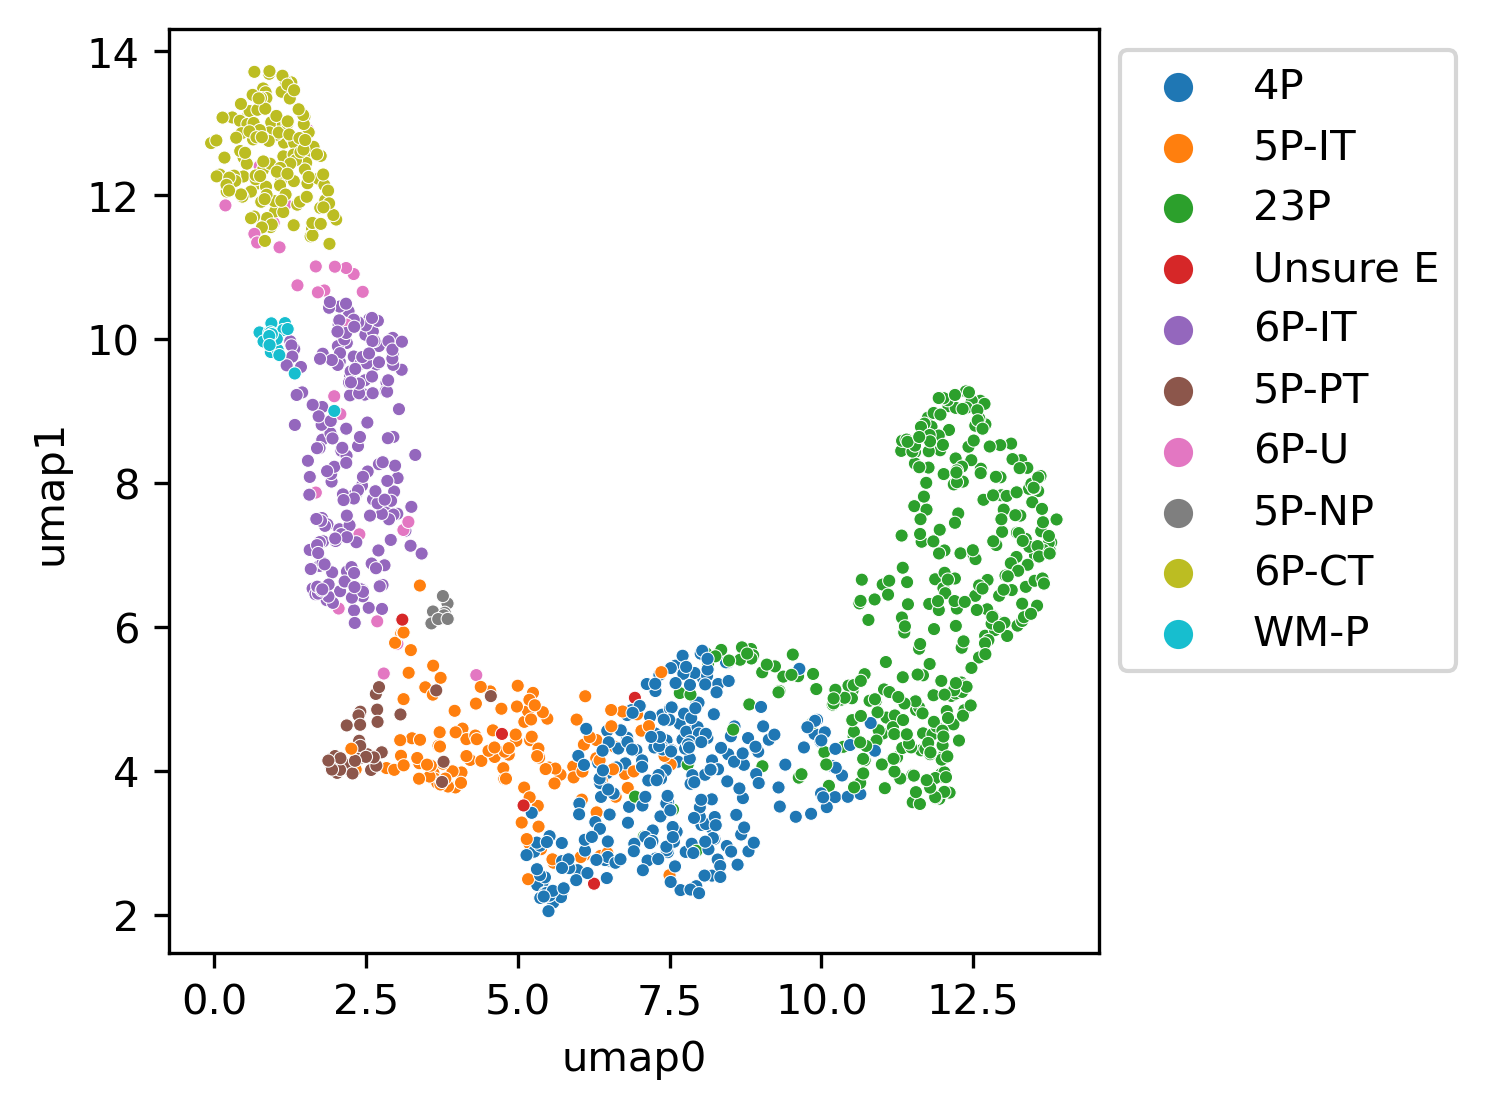

In [13]:

fig, ax = plt.subplots(figsize=(4, 4), dpi=300)
sns.scatterplot(
    x="umap0",
    y="umap1",
    data=feat_df,
    s=2,
    alpha=0.2,
    color='k',
)

sns.scatterplot(
    x="umap0",
    y="umap1",
    data=feat_df.query('cell_type_manual != "Unsure I"'),
    s=10,
    hue="cell_type_manual",
    
)

ax.legend().set_bbox_to_anchor((1,1))

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2> Question:  </h2>
<p> Can we use K-means clustering to divide our feature-space to cell type clusters? 

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p> We will first use a reduced dataset (with lower dimensionality) obtained from PCA, then apply K-means clustering

In [15]:
# test k-means for cell-type categorization - visualize on reduced data
from sklearn.cluster import KMeans
reduced_data = feat_df[["umap0", "umap1"]].copy().to_numpy()
# also try pca-reduced data?


# how many clusters? 
n_celltypes = 10
kmeans = KMeans(init="k-means++", n_clusters=n_celltypes, n_init=4)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].


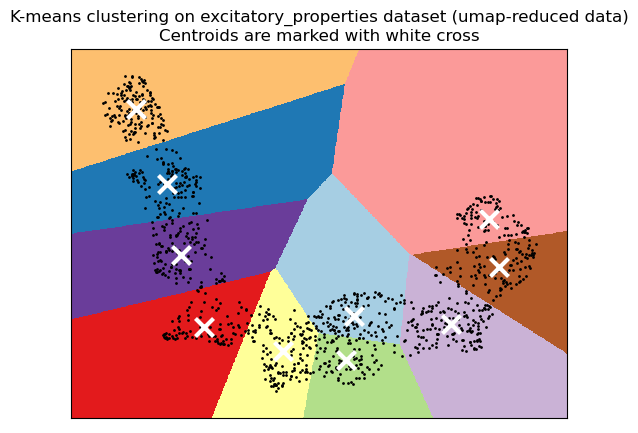

In [16]:
# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.title(
    "K-means clustering on excitatory_properties dataset (umap-reduced data)\n"
    "Centroids are marked with white cross"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2> Question: Why does K-means not work very well here?

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p> We will now try K-means clustering on the original dataset

In [24]:
# fit k-means on all features
reduced_for_kmeans = feat_df.copy()

## Which features from feat_df should we retain? Which ones should we remove? 

### comment this later ###
reduced_for_kmeans.drop(['Unnamed: 0','pt_root_id','classification_system',
       'cell_type_manual', 'has_ct_axon', 'umap0', 'umap1', 'm_type',
       'cell_id'], axis=1, inplace=True)

#####

# how many clusters? 
n_celltypes = 10
kmeans = KMeans(init="k-means++", n_clusters=n_celltypes, n_init=4)
kmeans_predict = kmeans.fit(reduced_for_kmeans)


In [26]:
kmeans_predict

KMeans(n_clusters=10, n_init=4)

In [29]:
reduced_data.shape

(1183, 2)

In [30]:
kmeans.labels_.shape

(1183,)

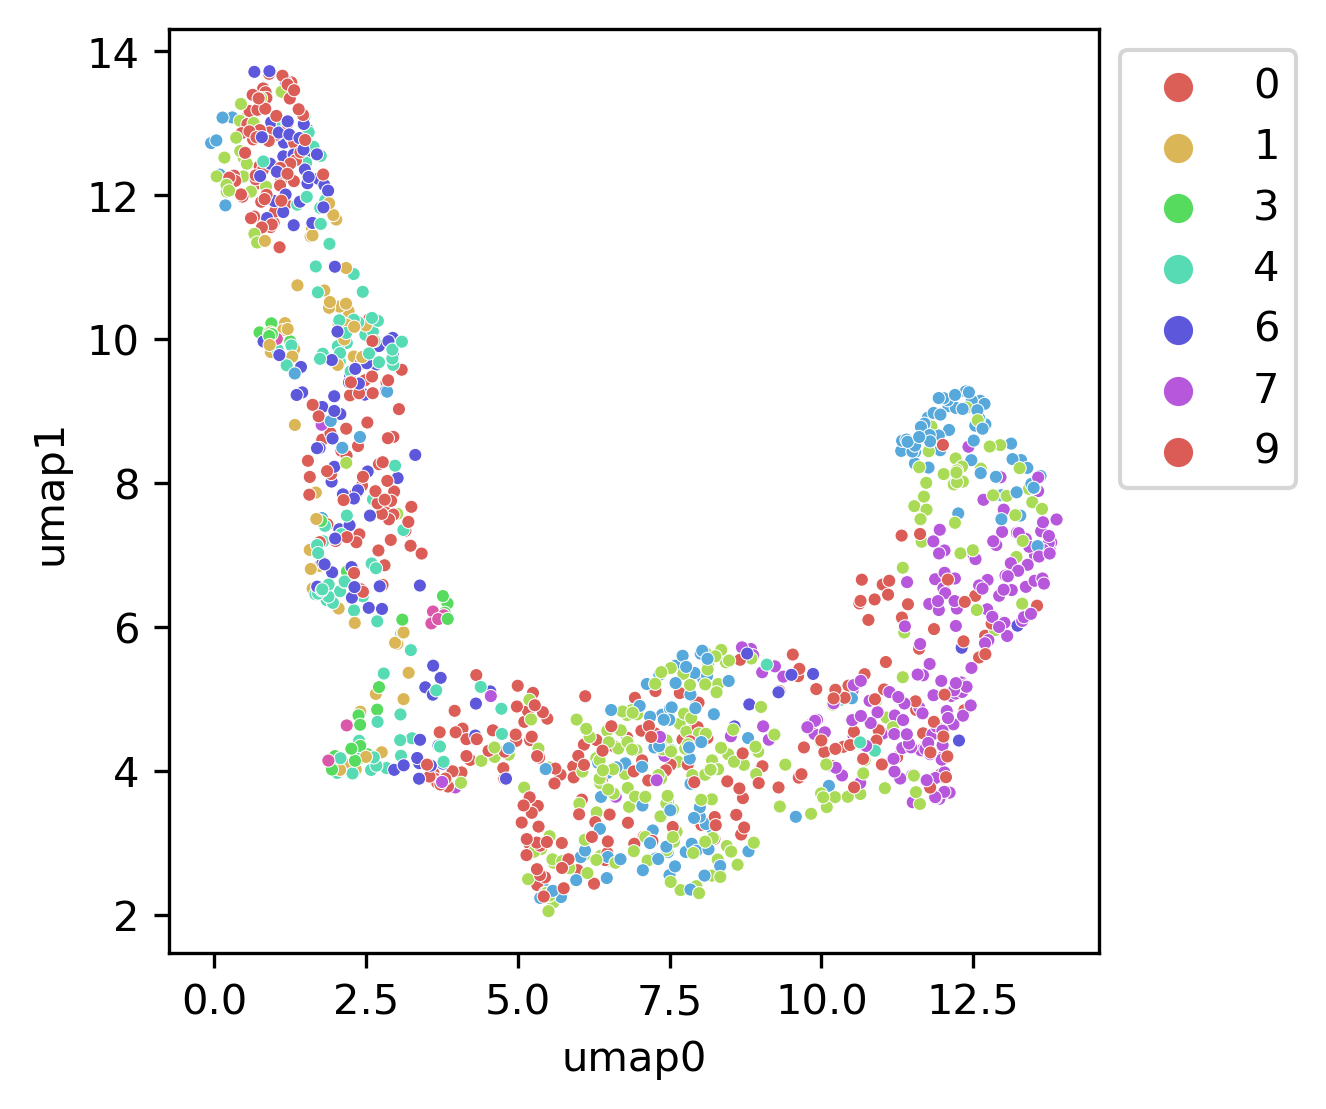

In [32]:
# Visualize these clusters - on umap data as we did for manual cell types
# reduced dataset:
reduced_data = feat_df[["umap0", "umap1"]].copy()
reduced_data['labels'] = kmeans.labels_

# Now visualize clustering results with dimenison reduced version
fig, ax = plt.subplots(figsize=(4, 4), dpi=300)
sns.scatterplot(
    x="umap0",
    y="umap1",
    data=reduced_data,
    s=2,
    alpha=0.2,
    color='k',
)

sns.scatterplot(
    x="umap0",
    y="umap1",
    data=reduced_data,
    s=10,
    hue="labels", palette="hls"
    
)

ax.legend().set_bbox_to_anchor((1,1))

#plt.figure(figsize=(3,3))
#plt.scatter(X_reduce[kmeans.labels_==2,0], X_reduce[kmeans.labels_==2,1], s = 20, c ='blue')
#plt.scatter(X_reduce[kmeans.labels_==1,0], X_reduce[kmeans.labels_==1,1], s = 20, c ='red')
#plt.scatter(X_reduce[kmeans.labels_==0,0], X_reduce[kmeans.labels_==0,1], s = 20, c ='green')

### stopped here ###

In [26]:
import phenograph

from sklearn import ensemble, model_selection

In [27]:
from xgboost import XGBClassifier
from bidict import bidict

bst = XGBClassifier(n_estimators=10, max_depth=7, learning_rate=1, objective='binary:logistic')

In [28]:
model_selection.cross_validate(
    bst,
    feat_df.dropna(subset='cell_type')[feat_cols_nospace],
    feat_df.dropna(subset='cell_type')['is_exc'],
    cv=5,
)

KeyError: ['cell_type']